In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def conjuntos_disjuntos_str(pai):
    grupos = {}
    for v in pai:
        raiz = v
        while pai[raiz] != raiz:
            raiz = pai[raiz]
        grupos.setdefault(raiz, set()).add(v)
    return " ".join("{" + ", ".join(sorted(grupos[raiz])) + "}" for raiz in sorted(grupos))

def plot_kruskal_passo(E, T_parcial, pos, passo):
    G = nx.Graph()
    for u, v, peso in E:
        G.add_edge(u, v, weight=peso)
    MST = nx.Graph()
    for u, v, peso in T_parcial:
        MST.add_edge(u, v, weight=peso)
    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=2)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    nx.draw_networkx_edges(MST, pos, edge_color='red', width=3)
    plt.title(f"Passo {passo}: {len(T_parcial)} arestas na MST")
    plt.pause(1)

class ConjuntosDisjuntos:
    def __init__(self, V):
        self.pai = {v: v for v in V}

    def BuscaConjunto(self, v):
        if self.pai[v] != v:
            self.pai[v] = self.BuscaConjunto(self.pai[v])
        return self.pai[v]

    def Uniao(self, u, v):
        raiz_u = self.BuscaConjunto(u)
        raiz_v = self.BuscaConjunto(v)
        if raiz_u != raiz_v:
            self.pai[raiz_v] = raiz_u
            return True
        return False

def Kruskal_VE_passo(V, E, pos):
    T = []
    conjuntos = ConjuntosDisjuntos(V)
    arestas = sorted(E, key=lambda x: x[2])
    print("Arestas ordenadas por peso:")
    print(arestas)
    plt.ion()
    plt.figure(figsize=(7, 5))
    header = f"{'Aresta':<10} {'Operação':<20} {'Coleção de conjuntos disjuntos'}"
    sep = f"{'-'*10} {'-'*20} {'-'*40}"
    table = [header, sep]
    print(header)
    print(sep)
    table.append(f"{'início':<10} {'-':<20} {conjuntos_disjuntos_str(conjuntos.pai)}")
    print(f"{'início':<10} {'-':<20} {conjuntos_disjuntos_str(conjuntos.pai)}")
    plot_kruskal_passo(E, T, pos, 0)
    passo = 1
    for u, v, peso in arestas:
        if conjuntos.BuscaConjunto(u) != conjuntos.BuscaConjunto(v):
            conjuntos.Uniao(u, v)
            T.append((u, v, peso))
            op = f"uniao({u},{v})"
        else:
            op = "-"
        linha = f"{f'({u},{v})':<10} {op:<20} {conjuntos_disjuntos_str(conjuntos.pai)}"
        table.append(linha)
        print(linha)
        plot_kruskal_passo(E, T, pos, passo)
        passo += 1
    plt.ioff()
    plt.show()
    return T, "\n".join(table)



Arestas ordenadas por peso:
[('A', 'S', 2), ('A', 'C', 4), ('C', 'S', 4), ('B', 'C', 5), ('A', 'B', 6), ('B', 'S', 6), ('D', 'S', 7), ('A', 'D', 8), ('B', 'D', 8), ('C', 'D', 9)]
Aresta     Operação             Coleção de conjuntos disjuntos
---------- -------------------- ----------------------------------------
início     -                    {A} {B} {C} {D} {S}


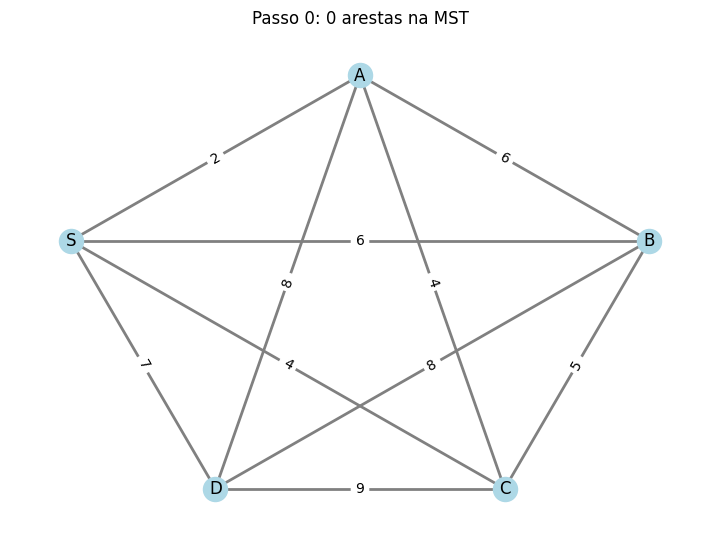

(A,S)      uniao(A,S)           {A, S} {B} {C} {D}


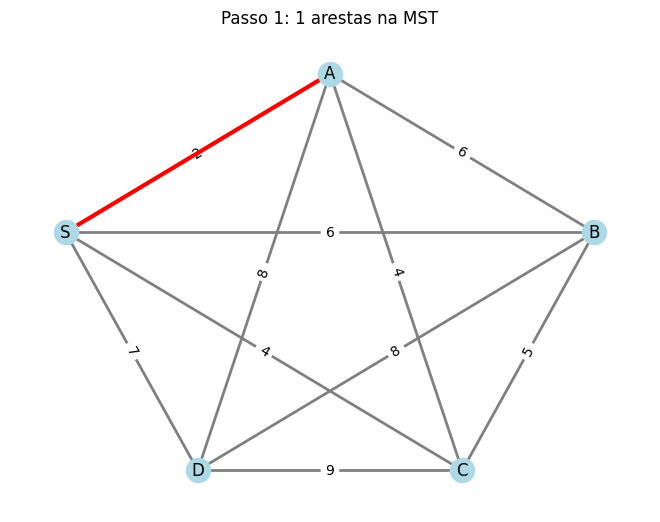

(A,C)      uniao(A,C)           {A, C, S} {B} {D}


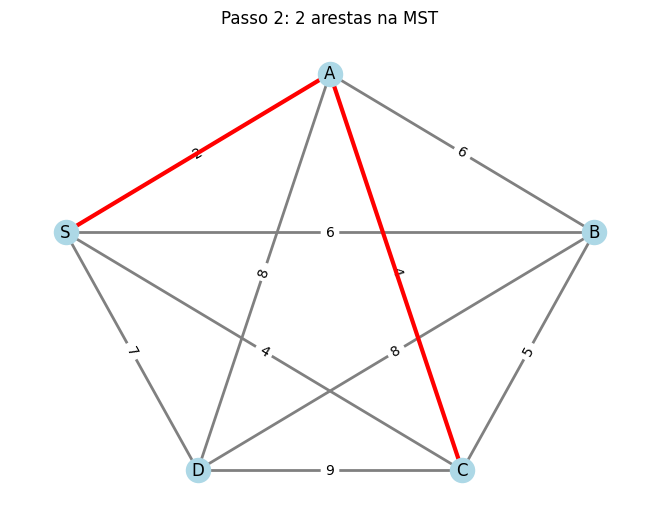

(C,S)      -                    {A, C, S} {B} {D}


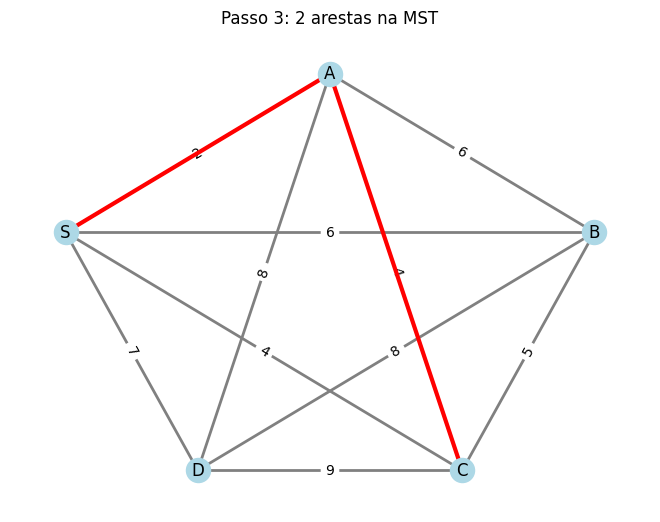

(B,C)      uniao(B,C)           {A, B, C, S} {D}


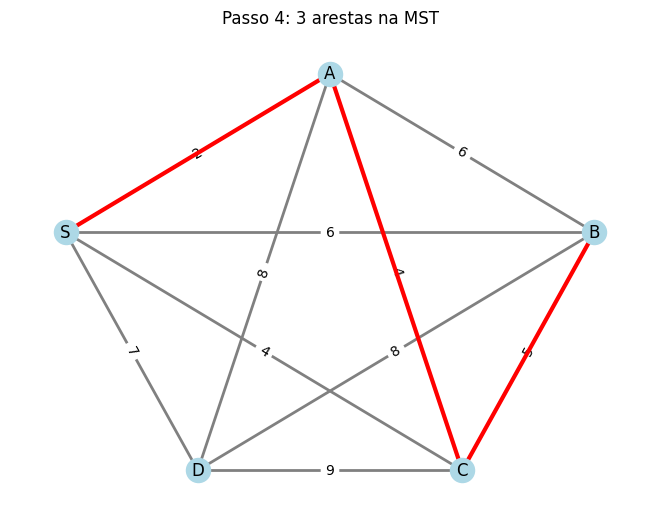

(A,B)      -                    {A, B, C, S} {D}


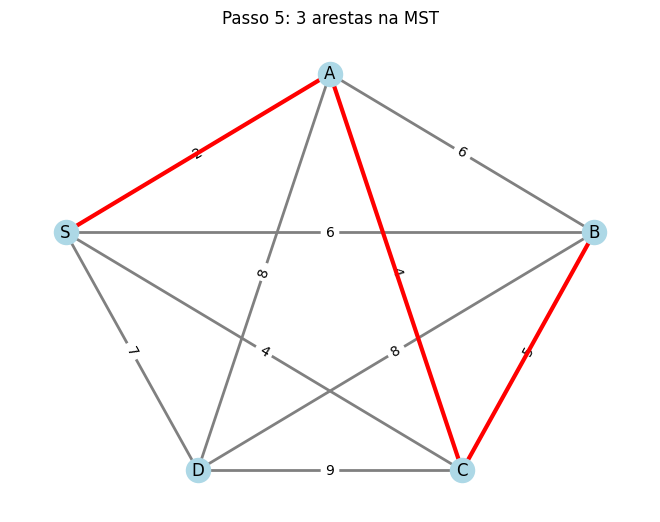

(B,S)      -                    {A, B, C, S} {D}


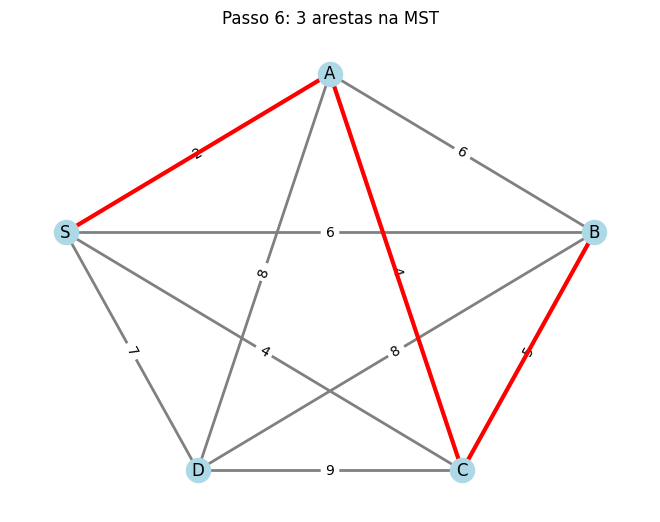

(D,S)      uniao(D,S)           {A, B, C, D, S}


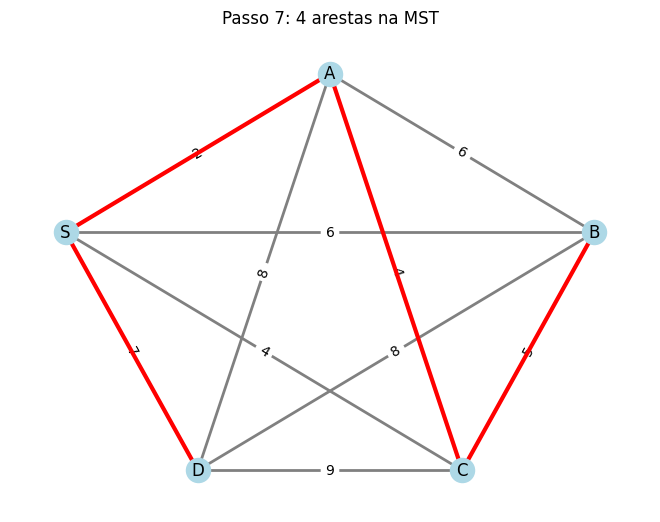

(A,D)      -                    {A, B, C, D, S}


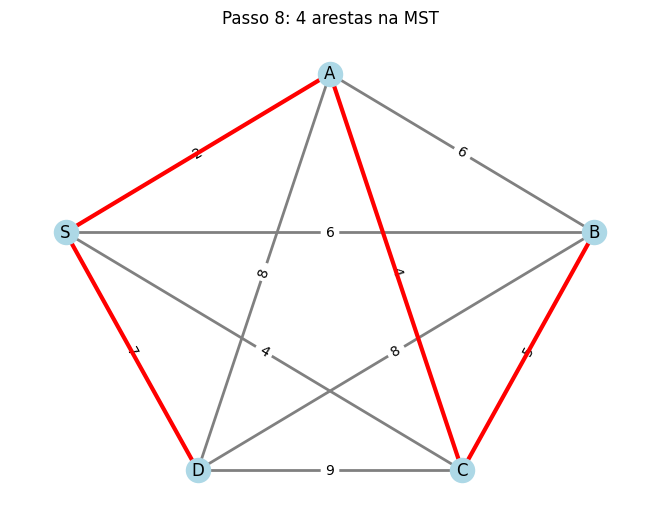

(B,D)      -                    {A, B, C, D, S}


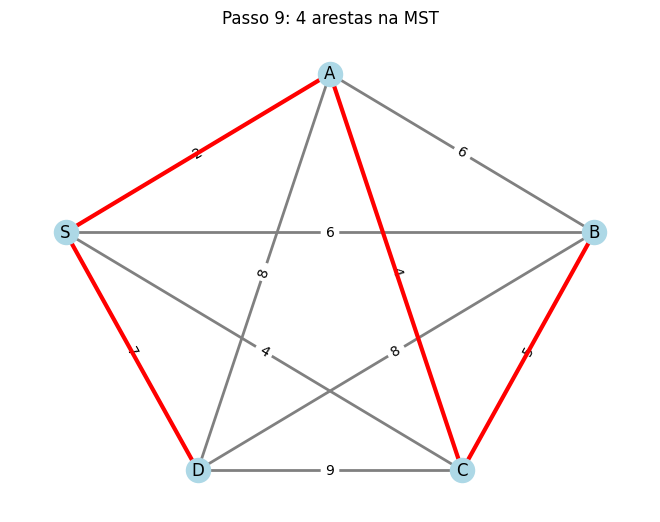

(C,D)      -                    {A, B, C, D, S}


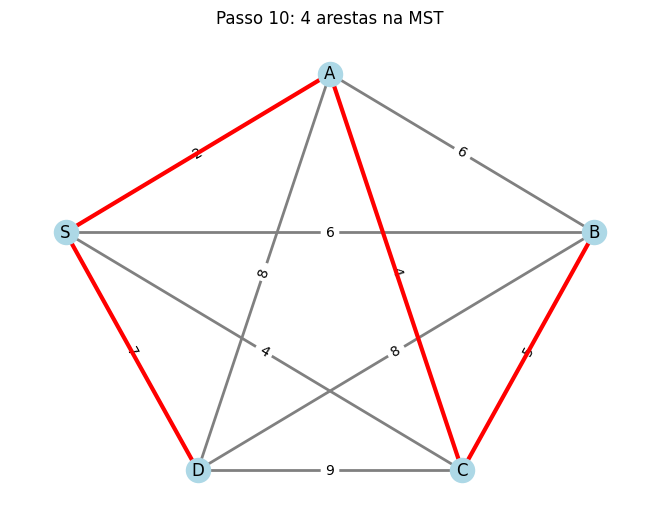


Árvore Geradora Mínima Final:
A - S (peso 2)
A - C (peso 4)
B - C (peso 5)
D - S (peso 7)

Tabela completa dos passos do Kruskal:
Aresta     Operação             Coleção de conjuntos disjuntos
---------- -------------------- ----------------------------------------
início     -                    {A} {B} {C} {D} {S}
(A,S)      uniao(A,S)           {A, S} {B} {C} {D}
(A,C)      uniao(A,C)           {A, C, S} {B} {D}
(C,S)      -                    {A, C, S} {B} {D}
(B,C)      uniao(B,C)           {A, B, C, S} {D}
(A,B)      -                    {A, B, C, S} {D}
(B,S)      -                    {A, B, C, S} {D}
(D,S)      uniao(D,S)           {A, B, C, D, S}
(A,D)      -                    {A, B, C, D, S}
(B,D)      -                    {A, B, C, D, S}
(C,D)      -                    {A, B, C, D, S}


In [3]:
# Exemplo de uso
V = ['A', 'B', 'C', 'D', 'S']
E = [
     ('A', 'B', 6),
    ('A', 'C', 4),
    ('A', 'D', 8),
    ('A', 'S', 2),
    ('B', 'C', 5),
    ('B', 'D', 8),
    ('B', 'S', 6),
    ('C', 'D', 9),
    ('C', 'S', 4),
    ('D', 'S', 7)
]
pos = {
   'A': (0, 5),
    'B': (4, 3),
    'C': (2, 0),
    'D': (-2, 0),
    'S': (-4, 3)
}
T, tabela = Kruskal_VE_passo(V, E, pos)
print("\nÁrvore Geradora Mínima Final:")
for u, v, peso in T:
    print(f"{u} - {v} (peso {peso})")

print("\nTabela completa dos passos do Kruskal:")
print(tabela)